STEP-1 : DATA PREPARATION

1. Our Final dataset is Charity Dataset

In [ ]:
import pandas as pd
df_project = pd.read_csv("/content/final_charity_data.csv")
df_project.describe()

,ID,reg1,reg2,reg3,reg4,home,kids,hinc,genf,wrat,...,plow,npro,tgif,lgif,rgif,tdon,tlag,agif,donr,damt
count,6002.000000,6002.0,6002.000000,6002.0,6002.0,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,3978.908197,0.0,0.347051,0.0,0.0,1.0,1.583972,3.939020,0.607797,7.071976,...,13.566478,61.348884,110.542153,19.148367,14.994335,18.636038,5.961346,11.481238,0.498834,7.209097
std,2301.807612,0.0,0.476072,0.0,0.0,0.0,1.412455,1.401887,0.488282,2.197558,...,12.140377,30.287968,60.840384,12.519304,9.955616,5.128554,2.543769,5.813222,0.500040,7.361232
min,1.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,1.500000,...,0.000000,2.000000,23.000000,3.000000,1.000000,5.000000,1.000000,1.890000,0.000000,0.000000
25%,1985.250000,0.0,0.000000,0.0,0.0,1.0,0.000000,3.000000,0.000000,6.000000,...,4.000000,37.000000,65.000000,10.000000,7.000000,15.000000,4.000000,6.950000,0.000000,0.000000
50%,3945.500000,0.0,0.000000,0.0,0.0,1.0,2.000000,4.000000,1.000000,8.000000,...,10.000000,59.000000,91.000000,16.000000,12.000000,18.000000,5.000000,10.200000,0.000000,0.000000
75%,5963.750000,0.0,1.000000,0.0,0.0,1.0,3.000000,5.000000,1.000000,9.000000,...,20.000000,83.000000,141.000000,25.000000,20.000000,22.000000,7.000000,14.820000,1.000000,14.000000
max,8009.000000,0.0,1.000000,0.0,0.0,1.0,5.000000,7.000000,1.000000,9.000000,...,44.000000,152.000000,255.000000,47.500000,39.500000,32.500000,11.500000,26.625000,1.000000,27.000000


2. Data Cleaning : We already handled all the missing data and outliers detected in Weekly Challenge 3.




In [ ]:
missing_data = df_project.isnull().sum()
print("Missing Values Summary:\n", missing_data)

Missing Values Summary:
 ID            0
reg1          0
reg2          0
reg3          0
reg4          0
home          0
kids          0
hinc          0
genf          0
wrat          0
avhv          0
incm          0
inca          0
plow          0
npro          0
tgif          0
lgif          0
rgif          0
tdon          0
tlag          0
agif          0
donr          0
damt          0
Validation    0
dtype: int64


In [ ]:
import pandas as pd

# Assuming 'df_project' is your DataFrame
outliers_dict = {}

# Check for outliers in numerical columns
for column in df_project.select_dtypes(include='number').columns:
    Q1 = df_project[column].quantile(0.25)
    Q3 = df_project[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_project[(df_project[column] < lower_bound) | (df_project[column] > upper_bound)]

    if not outliers.empty:
        outliers_dict[column] = outliers.index.tolist()

# Check for outliers in categorical columns
categorical_outliers = {}
for column in df_project.select_dtypes(include='object').columns:
    value_counts = df_project[column].value_counts()
    rare_categories = value_counts[value_counts < (0.01 * len(df_project))].index.tolist()
    if rare_categories:
        categorical_outliers[column] = rare_categories

print("Numerical Columns Outliers:")
for col, indices in outliers_dict.items():
    print(f"Outliers detected in '{col}': {len(indices)} outliers at rows {indices}")

if not outliers_dict:
    print("No outliers detected in any numerical column.")

print("\nCategorical Columns Rare Categories:")
for col, categories in categorical_outliers.items():
    print(f"Rare categories in '{col}': {categories}")

if not categorical_outliers:
    print("No rare categories detected in any categorical column.")


Numerical Columns Outliers:
No outliers detected in any numerical column.

Categorical Columns Rare Categories:
No rare categories detected in any categorical column.


3. Hypothesis :
   
   From our intial observations,we observed that
   "Higher wealth ratings (wrat) and household income (hinc) lead to larger donations (damt)"

In [ ]:
# Calculating correlation between damt,wrat,hinc
correlation = df_project[['damt', 'wrat', 'hinc']].corr()
print(correlation)

          damt      wrat      hinc
damt  1.000000  0.226663  0.050842
wrat  0.226663  1.000000 -0.004741
hinc  0.050842 -0.004741  1.000000


In [ ]:
# Used Regression Analysis to predict donation amount based on wrat and hinc
from sklearn.linear_model import LinearRegression
X = df_project[['wrat', 'hinc']]  # Independent variables
y = df_project['damt']  # Target variable

model = LinearRegression()
model.fit(X, y)
print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Regression coefficients: [0.76008482 0.27261683]
Intercept: 0.7599521437247301


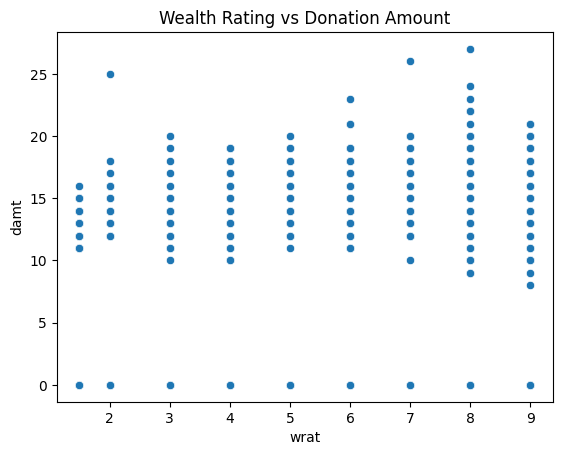

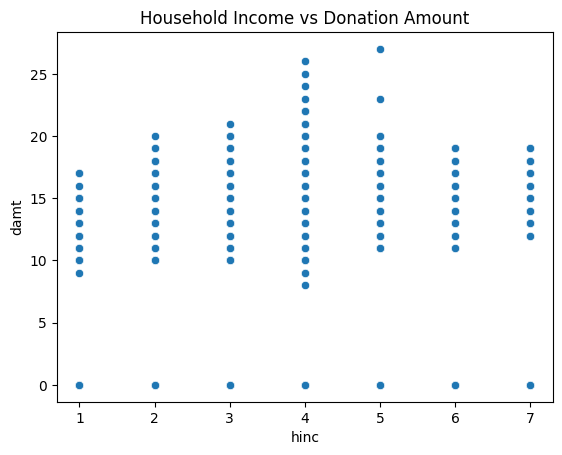

In [ ]:
# Scatter Plot to depict the relationship between Donation Amount vs Wealth Rating and Household Income
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_project, x='wrat', y='damt')
plt.title("Wealth Rating vs Donation Amount")
plt.show()

sns.scatterplot(data=df_project, x='hinc', y='damt')
plt.title("Household Income vs Donation Amount")
plt.show()


STEP-2 : EXPLORATORY DATA ANALYSIS

1.Univariate Analysis :
Plotted Histograms for all the numerical columns and Plotted Bar Graphs for all the categrocial columns. Here below I mentioned the skweness for each variable.


*   wrat- Extremely right skewed with majority of values with 8-9
*   avhv- Roughly normal but with slight right skew, centered around 150-200.
*   incm,inca- Very similar distributions, both approximately normal with slight right skew, centered around 40-50.
*   npro- Most normally distributed.
*   tgif, lgif, rgif: All show right-skewed patterns with a peak near zero and long right tails
*   tdon- Multiple peaks and bell shaped.
*   tlag- Shows unusual discrete jumps with regular spacing with showing peaks at roughly 2.5, 5.0, 7.5 intervals.Depicts Categroized Distribution.
*   agif- Right skewed with reducing frequency
*   damt- Bimodal dtribution at with more number of zero danotaion amount and other with peak at 15.Shows two different type of behaviors
reg1: About 6000 cases at value 0

*   reg2: Approximately 4000 cases at 0, 2000 at 1
*   reg3: About 6000 cases at value 0
*   reg4: About 6000 cases at value 0
*   home: About 6000 cases at value 1
*   genf: Roughly 2200 cases at 0, 3500 at 1









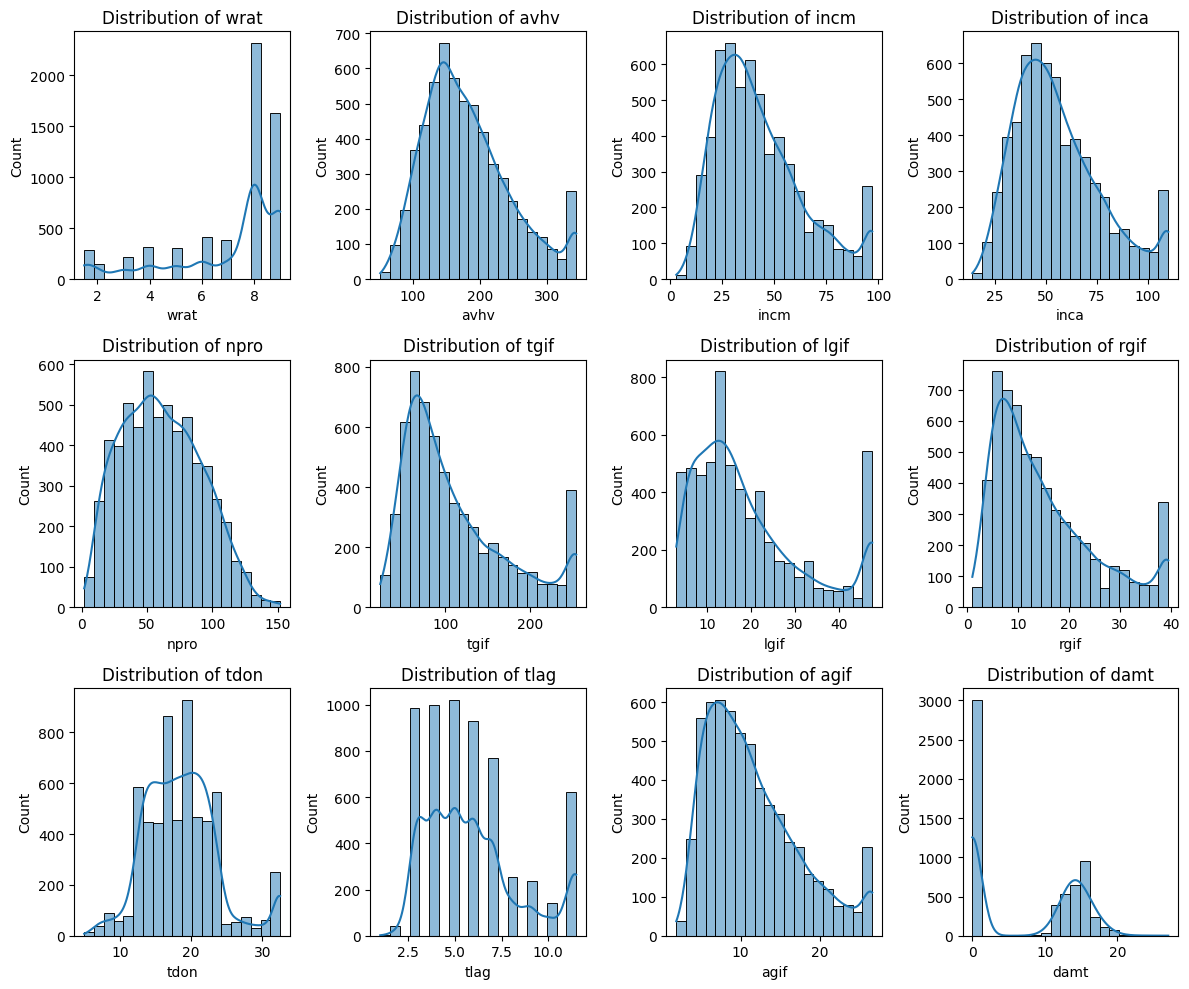

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns in the dataset
numerical_columns = ['wrat', 'avhv', 'incm', 'inca', 'npro', 'tgif', 'lgif', 'rgif', 'tdon', 'tlag', 'agif', 'damt']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_project[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


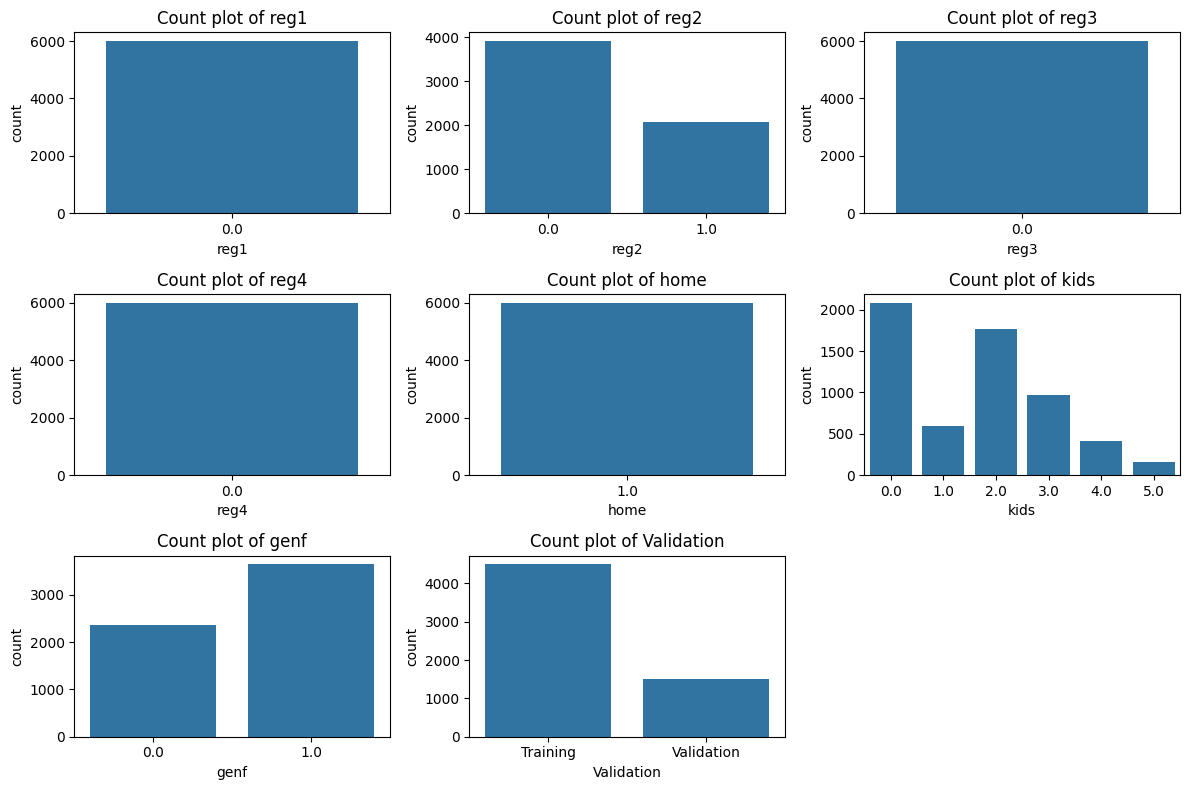

In [ ]:
categorical_columns = ['reg1', 'reg2', 'reg3', 'reg4', 'home', 'kids', 'genf', 'Validation']

# Plot bar charts for categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_project[col])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()


2.Bi variate analysis

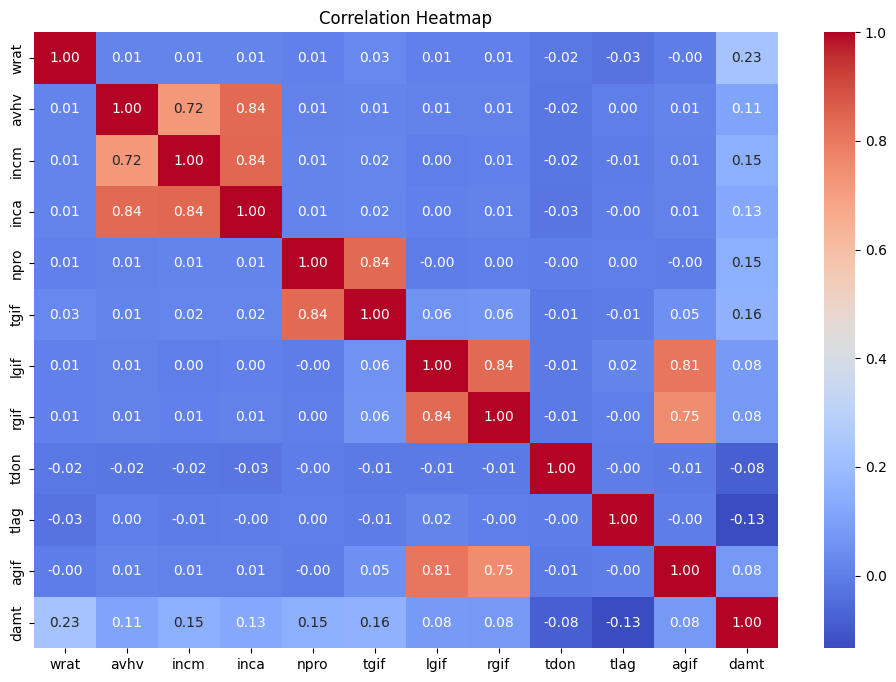

In [ ]:
corr_matrix = df_project[numerical_columns].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


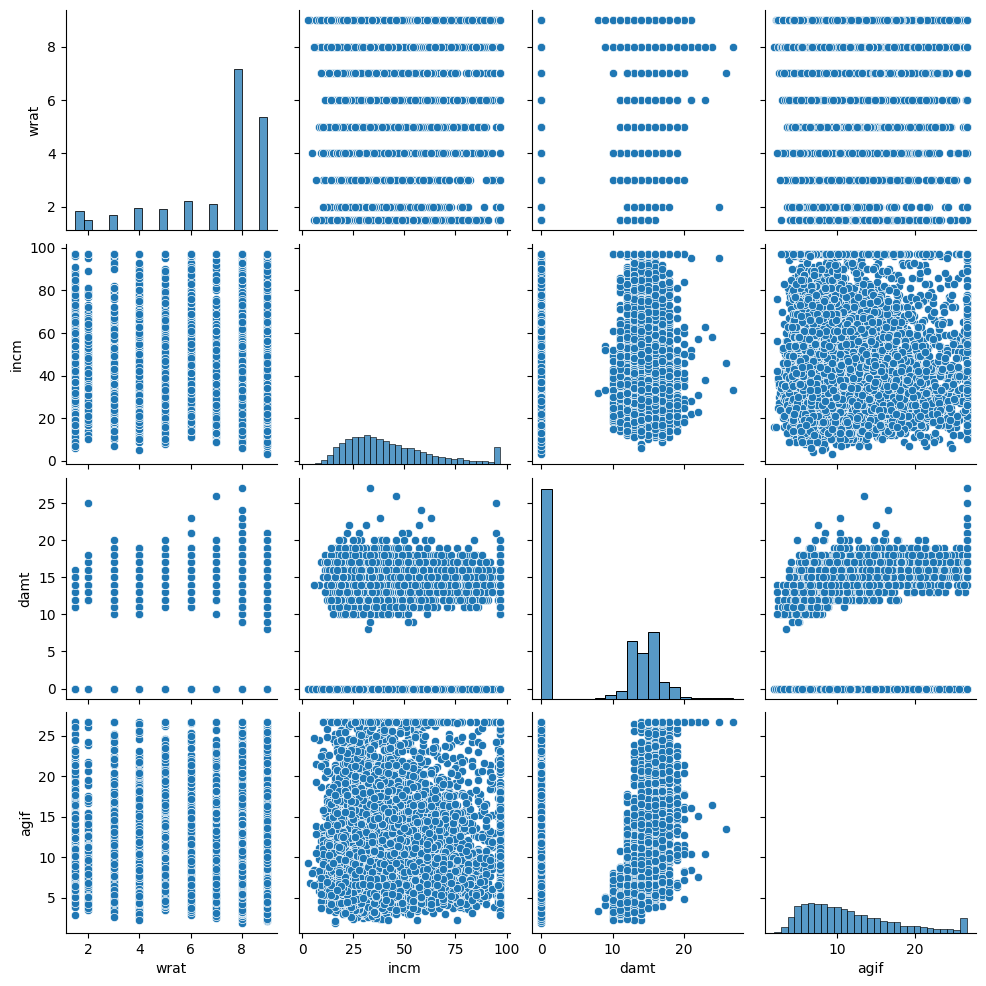

In [ ]:
sns.pairplot(df_project[['wrat', 'incm', 'damt', 'agif']])
plt.show()